<a href="https://colab.research.google.com/github/agamthind96/Data-Analysis/blob/main/Intermediary_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, we will study about about intermediary statistics.

Directory, Libraries and Data

In [1]:
# Change the directory
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Intermediary Statistics


In [2]:
# Libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load the data
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Normal Distribution

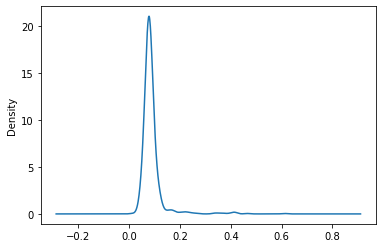

In [4]:
# Density Distribution
df.chlorides.plot.density();

In [5]:
# 68-95-99 check
(df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std()) & 
       (df.chlorides >= df.chlorides.mean() - 1 * df.chlorides.std())].chlorides.count()/df.chlorides.count())*100

94.80925578486554

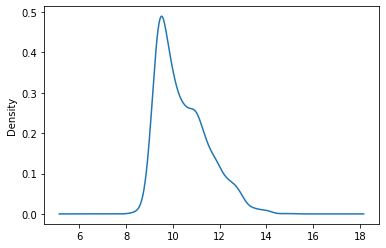

In [6]:
# Question : Plot Alcohol Distribution and check how many observations are within 3 standard deviations.
df.alcohol.plot.density();

In [7]:
(df.loc[(df.alcohol <= df.alcohol.mean() + 3.0*df.alcohol.std()) & 
       (df.alcohol >= df.alcohol.mean() - 3.0*df.alcohol.std())].alcohol.count()/df.alcohol.count())*100

99.49968730456536

## P-Value

- P-Value tells us if we reject or not the hypothesis.
- P-Value is the probability of obtaining results as extreme as the observed results of a statistical hypothesis test, assuming the null hypothesis is correct.
- P-Value helps us understand what is the likelihood of "accepting" aka "fail to reject" the hypthesis.
- A small P-value means we favour the alternative hypothesis.
- P-Value threshold is usually 0.05


* Example-1
 **H0** : The average salary of Business Analysts is INR 2000000.
 **H1** : The average salary of Business Analysts is not INR 2000000.
 Suppose P-Value -> 0.2, this implies that we fail to reject the null hypothesis.

## Shapiro-Wilk Test
- Quantifies how likely it is that data was drawn from Gaussian distribution.
- Created in 1965 and is one of the many normality tests.


 **Interpretation**
* **H0** : The distribution is Gaussian.
- If p>0.05 -> The distribution appears to have normal distribution.
* **H1** : If p<0.05 -> The distribution doesn't follows Gaussian distribution -> rejects the null hypothesis.


In [8]:
# Shapiro-Wilks test for Normality
stat, p = st.shapiro(df.chlorides)
p

0.0

In [9]:
# Function for Shapiro Normality test
def shapiro_normality_test(arr):
  """
  Takes the input as array or column from DataFrame and return the P-value.
  """
  import scipy.stats as st
  stat, p_value = st.shapiro(arr)
  print(p_value)
  # Condition check for hypthesis
  if p_value > 0.05 :
    print("Sample looks Gaussian/Normal (fail to reject H0)")
  else:
    print("Sample doesn't looks Gaussian/Normal (reject H0)")

In [10]:
# Question : Shapiro-Wilks test for Sulphates
shapiro_normality_test(df.sulphates)

5.821617678881608e-38
Sample doesn't looks Gaussian/Normal (reject H0)


## Standard Error (of the sample mean)

- The standard error of the sample mean is an estimate of how far the sample mean is likely to be from population mean.
- It is different from standard deviation in the way that standard deviation is the degree to which individuals within the sample differ from the sample mean.
- Standard Error = Standard Deviation/(sqrt(sample size))

In [11]:
# Standard Error using function and using manual computation
def standard_error(df):
  """
  It calculates the standard error of the data using function as well as manual computation.
  """
  result = st.sem(df)
  print(f'Standard error calculated using function is {result}')
  manual_result = df.std()/m.sqrt(len(df))
  print(f'Standard error calculated manually is {manual_result}')



In [12]:
standard_error(df.alcohol)

Standard error calculated using function is 0.026650018979018173
Standard error calculated manually is 0.026650018979018118


In [13]:
# Question : Standard Error for pH
standard_error(df.pH)

Standard error calculated using function is 0.0038608683325203784
Standard error calculated manually is 0.0038608683325203753


## Z-Score

- Gives you an idea of how far from the mean is a data point.
- Z-Scores are a way to compare results to a "normal" population.
- It is a way to standardize values.
- Z-score = (x-mu)/std

## Confidence-Interval
- A range that gives a sense of how precisely a statistic estimates a parameter.
- The associated confidence level gives the probability with which an estimated interval will contain the true value of the parameter.


In [14]:
# Confidence Interval of the mean of citric acid
print(df[["citric acid"]].mean())
st.norm.interval(alpha=0.95,
                 loc=df[['citric acid']].mean(),
                 scale = st.sem(df[['citric acid']]))

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

In [15]:
# Function for Confidence Interval of mean of some feature.
def confidence_interval(df,ci_level):
  """
  This function returns the mean and Confidence Interval of the mean of some feature of DataFrame.
  """
  print(f'Mean of the required parameter is {df.mean()}')
  ci = st.norm.interval(alpha=ci_level,
                        loc=df.mean(),
                        scale=st.sem(df))
  
  print(f'Confidence Interval lies in the range {ci[0]} and {ci[1]}')

  df.hist()


Mean of the required parameter is 0.9967466791744831
Confidence Interval lies in the range 0.9966541725972511 and 0.9968391857517152


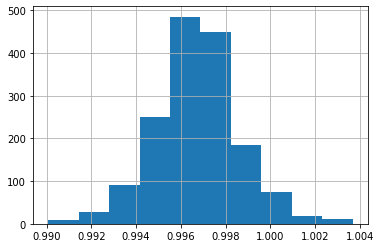

In [16]:
# Question : Confidence Interval of the Density mean and plot histogram
confidence_interval(df=df.density, ci_level=0.95)

## T-test
- Helps us understand whether one group is statistically different from the another.
- if p-value is < 0.05, then the groups are statistically different.



In [17]:
# Laoad the required data
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,Desktop_applications_developer,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,0,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,0,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,0,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
# Subset for UK people  and Germany people salary
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
print(salary_uk.head())

salary_ger = data.loc[data.Country == 'Germany'].Salary
salary_ger.head()
 

0     100000.0
11     32500.0
12     30000.0
17     32500.0
18     43750.0
Name: Salary, dtype: float64


3     64516.12903
7     53763.44086
9     83870.96774
25    10752.68817
43    59139.78495
Name: Salary, dtype: float64

In [19]:
# T-test
stat, p_value = st.ttest_ind(salary_uk, salary_ger)
p_value

0.026389999555203502

In [20]:
# Function for T-test
def t_test(a,b):
  """
  Takes the samples of two different groups and returns p_value using t-test.
  """

  stats, p_value = st.ttest_ind(a,b)
  print(p_value)
  # Condtion check
  if p_value>=0.05:
    print(f'As p_value is {p_value}, so both groups have similar characterstics(fail to reject H0)')
  else:
    print(f'As p_value is {p_value}, so there is difference in characterstics of both groups(reject H0)')

  a.hist(legend=True)
  b.hist()


In [21]:
# Question : T-test in Experience in India and UK
india_exp = data.loc[data.Country == 'India'].YearsCodedJob
uk_exp = data.loc[data.Country == 'United States'].YearsCodedJob

5.225676347614714e-58
As p_value is 5.225676347614714e-58, so there is difference in characterstics of both groups(reject H0)


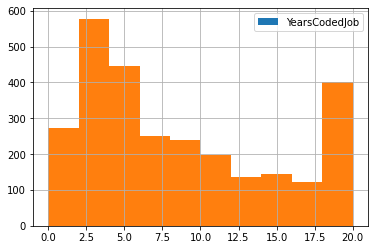

In [22]:
t_test(india_exp, uk_exp)

## Chi-Square test (Person)
- Detemine whether there is a statistically significant difference between the expected frequencies and observed frequencies.
- A t-test tests the null hypothesis about two means whereas chi-square test requires categorical variables, each having any number of levels.
- **Null Hypothesis** : There is no relationship between variables.


In [24]:
# Cross Tabulation
tab = pd.crosstab(index=data.Country,
                  columns=data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [27]:
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)

3.321120877301216e-16


In [28]:
def chi_square_test(index,columns):
  """
  It takes the index and column values and returns the chi-sqaure value, p_value, degress of freedom and expected values.
  """ 
  tab = pd.crosstab(index=index,
                    columns=columns)
  chi2, p, dof, exp = st.chi2_contingency(tab)
  print(f'The Chi-square value is {chi2}.')
  print(f'The p-value is {p}.')
  print(f'The degrees of freedom are {dof}.')

  # Condition check
  if p>0.05:
    print("There is no relationship (fail to reject H0)")
  else:
    print("There is strong relationship (reject H0)")

  


In [29]:
# Question : Chi-Square test between company size and hobbies.
chi_square_test(index=data.CompanySizeNumber,
                columns=data.Hobby)

The Chi-square value is 15.935902955290901.
The p-value is 0.025708455559671047.
The degrees of freedom are 7.
There is strong relationship (reject H0)
